Link to Medium blog post: https://medium.com/analytics-vidhya/heres-all-you-need-to-know-about-encoding-categorical-data-with-python-code-53e367a79b5c

# Here’s All you Need to Know About Encoding Categorical Data (with Python code)

In [1]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 331.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 14.2 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


### Label Encoding or Ordinal Encoding

We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.

In [2]:
import category_encoders as ce 
import pandas as pd 
train_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})
 # create object of Ordinalencoding 
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True, mapping=[{'col':'Degree', 'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'phd':5}}]) 
#Original data 
train_df

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [3]:
#fit and transform train data 
df_train_transformed = encoder.fit_transform(train_df)
df_train_transformed

,Degree
0,1.0
1,4.0
2,2.0
3,3.0
4,3.0
5,4.0
6,-1.0
7,1.0
8,1.0


### One Hot Encoding

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable. This might sound complicated. Let us take an example to understand this better. Suppose we have a dataset with a category animal, having different animals like Dog, Cat, Sheep, Cow, Lion. Now we have to one-hot encode this data.

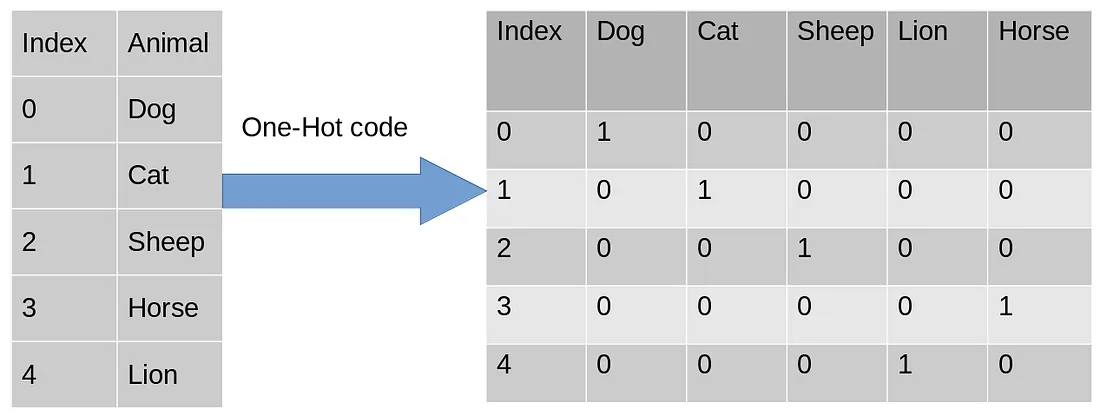

After encoding, in the second table, we have dummy variables each representing a category in the feature Animal. Now for each category that is present, we have 1 in the column of that category and 0 for the others. Let’s see how to implement a one-hot encoding in python.

In [12]:
import category_encoders as ce 
import pandas as pd 
data=pd.DataFrame({'City':[ 'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi' ]}) 
#Create object for one-hot encoding 
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True) 
#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [13]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

,City_Delhi,City_Mumbai,City_Hydrabad,City_Chennai,City_Bangalore
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0


### Dummy Encoding

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

To understand this better let’s see the image below. Here we are coding the same data using both one-hot encoding and dummy encoding techniques. While one-hot uses 3 variables to represent the data whereas dummy encoding uses 2 variables to code 3 categories.

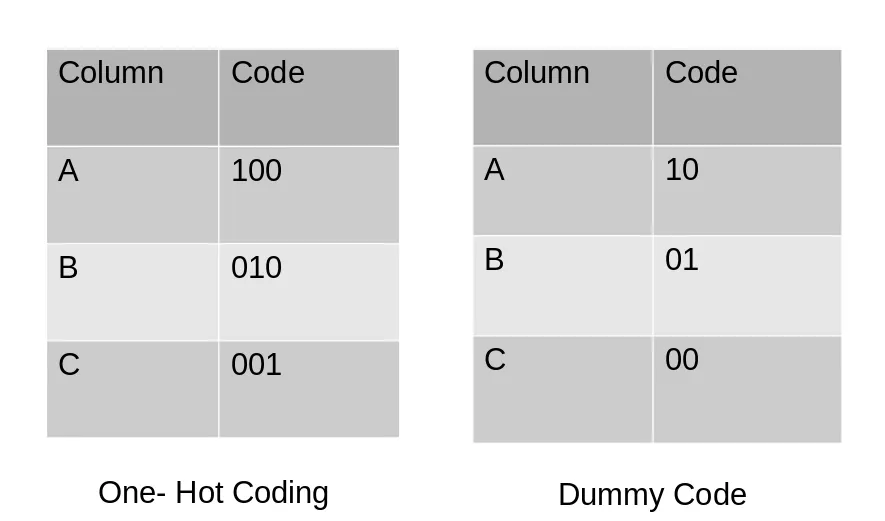

In [9]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi', 'Hyderabad']}) 
#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [11]:
#encode the data 
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,False,True,False,False
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,False,True,False


Here using drop_first argument, we are representing the first label Bangalore using 0.

### Drawbacks of One-Hot and Dummy Encoding

One hot encoder and dummy encoder are two powerful and effective encoding schemes. They are also very popular among the data scientists, But may not be as effective when-

1. A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
2. If we have multiple categorical features in the dataset similar situation will occur and again we will end to have several binary features each representing the categorical feature and their multiple categories e.g a dataset having 10 or more categorical columns.

In both the above cases, these two encoding schemes introduce sparsity in the dataset i.e several columns having 0s and a few of them having 1s. In other words, it creates multiple dummy features in the dataset without adding much information.

Also, they might lead to a Dummy variable trap. It is a phenomenon where features are highly correlated. That means using the other variables, we can easily predict the value of a variable.

Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive. Further, while using tree-based models these encodings are not an optimum choice.

### Effect Encoding:

This encoding technique is also known as Deviation Encoding or Sum Encoding. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.

The row containing only 0s in dummy encoding is encoded as -1 in effect encoding. In the dummy encoding example, the city Bangalore at index 4 was encoded as 0000. Whereas in effect encoding it is represented by -1–1–1–1.

Let us see how we implement it in python-

In [14]:
import category_encoders as ce 
import pandas as pd 
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']}) 
encoder=ce.sum_coding.SumEncoder(cols='City',verbose=False,) #Original Data 
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [15]:
encoder.fit_transform(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,City_0,City_1,City_2,City_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,-1.0,-1.0,-1.0,-1.0
5,1,1.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0


### Hash Encoder


To understand Hash encoding it is necessary to know about hashing. Hashing is the transformation of arbitrary size input in the form of a fixed-size value. We use hashing algorithms to perform hashing operations i.e to generate the hash value of an input. Further, hashing is a one-way process, in other words, one can not generate original input from the hash representation.

Hashing has several applications like data retrieval, checking data corruption, and in data encryption also. We have multiple hash functions available for example Message Digest (MD, MD2, MD5), Secure Hash Function (SHA0, SHA1, SHA2), and many more.

Just like one-hot encoding, the Hash encoder represents categorical features using the new dimensions. Here, the user can fix the number of dimensions after transformation using n_component argument. Here is what I mean — A feature with 5 categories can be represented using N new features similarly, a feature with 100 categories can also be transformed using N new features.

In [17]:
import category_encoders as ce 
import pandas as pd 
#Create the dataframe 
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']}) 
#Create object for hash encoder 
encoder=ce.HashingEncoder(cols='Month',n_components=6)

In [18]:
#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


Since Hashing transforms the data in lesser dimensions, it may lead to loss of information. Another issue faced by hashing encoder is the collision. Since here, a large number of features are depicted into lesser dimensions, hence multiple values can be represented by the same hash value, this is known as a collision.

Moreover, hashing encoders have been very successful in some Kaggle competitions. It is great to try if the dataset has high cardinality features.



### Binary Encoding

Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.



In [21]:
#Import the libraries 
import category_encoders as ce
import pandas as pd 
#Create the Dataframe 
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']}) 
#Create object for binary encoding 
encoder= ce.BinaryEncoder(cols=['City'],return_df=True) 
#Original Data 
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [22]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded

,City_0,City_1,City_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

### Base N Encoding

Before diving into BaseN encoding let’s first try to understand what is Base here?

In the numeral system, the Base or the radix is the number of digits or a combination of digits and letters used to represent the numbers. The most common base we use in our life is 10 or decimal system as here we use 10 unique digits i.e 0 to 9 to represent all the numbers. Another widely used system is binary i.e. the base is 2. It uses 0 and 1 i.e 2 digits to express all the numbers.

For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form. If you want to change the Base of encoding scheme you may use Base N encoder. In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

In [25]:
#Import the libraries 
import category_encoders as ce 
import pandas as pd 
#Create the dataframe 
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']}) 
#Create an object for Base N Encoding 
encoder= ce.BaseNEncoder(cols=['City'],return_df=True,base=5) 
#Original Data 
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [27]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded

,City_0,City_1
0,0,1
1,0,2
2,0,3
3,0,4
4,1,0
5,0,1
6,0,3
7,0,2
8,1,1


In the above example, I have used base 5 also known as the Quinary system. It is similar to the example of Binary encoding. While Binary encoding represents the same data by 4 new features the BaseN encoding uses only 3 new variables.

Hence BaseN encoding technique further reduces the number of features required to efficiently represent the data and improving memory usage. The default Base for Base N is 2 which is equivalent to Binary Encoding.

### Target Encoding

Target encoding is a Baysian encoding technique.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.

In [29]:
#import the libraries 
import pandas as pd 
import category_encoders as ce 
#Create the Dataframe 
data=pd.DataFrame({'class':['A,','B','C','B','C','A','A','A'],'Marks':[50,30,70,80,45,97,80,68]}) 
#Create target encoding object 
encoder=ce.TargetEncoder(cols='class') 
#Original Data 
data

,class,Marks
0,"A,",50
1,B,30
2,C,70
3,B,80
4,C,45
5,A,97
6,A,80
7,A,68


In [30]:
#Fit and Transform Train Data 
encoder.fit_transform(data['class'],data['Marks'])

,class
0,63.048373
1,63.581489
2,63.936117
3,63.581489
4,63.936117
5,67.574421
6,67.574421
7,67.574421


We perform Target encoding for train data only and code the test data using results obtained from the training dataset. Although, a very efficient coding system, it has the following issues responsible for deteriorating the model performance-

It can lead to target leakage or overfitting. To address overfitting we can use different techniques.

In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.

In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.

The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.